# Iranian Lip Reading Classification Project

Lip reading, a fascinating domain at the intersection of computer vision and natural language processing, plays a pivotal role in bridging communication gaps, particularly for the hearing impaired. In this Jupyter Notebook, we embark on a challenging task: Iranian lip reading classification.

The dataset provided for this project comprises both training and test sets, with each instance represented as an MP4 file. Our primary objective is to develop robust classification models capable of accurately categorizing each MP4 file into one of the following labels:

1. Iran
2. Khoshhal (Happy)
3. Moa'lem (Teacher)
4. Salam (Hello)
5. Khodahafez (Bye)

To tackle this task, we'll explore several approaches leveraging deep learning techniques:

1. **CNN and RNN**: We'll initially implement a combination of Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs) to capture both spatial and temporal features from the lip movements in the video sequences.

2. **Transformer CNN**: Next, we'll experiment with a Transformer architecture, a powerful sequence modeling framework known for its effectiveness in capturing long-range dependencies. We'll combine it with CNNs to leverage the self-attention mechanism for lip reading.

3. **3D Convolution**: Finally, we'll explore the use of 3D convolutional networks, which directly operate on spatiotemporal volumes, allowing the model to learn both spatial and temporal patterns simultaneously.

Throughout this notebook, we'll undertake the following steps:

- **Data Preprocessing**: We'll preprocess the lip reading data to prepare it for model training.
- **Model Development**: We'll design and implement each of the aforementioned architectures using popular deep learning frameworks such as TensorFlow or PyTorch.
- **Model Training and Evaluation**: We'll train the models on the training set and evaluate their performance on the test set, using appropriate metrics to assess classification accuracy.
- **Comparative Analysis**: We'll compare the performance of the different architectures, considering factors such as model complexity, training time, and inference speed.
- **Discussion and Conclusion**: Finally, we'll discuss the results obtained, potential limitations of the models, and avenues for future research in Iranian lip reading classification.

Let's embark on this exciting journey of exploring diverse deep learning approaches for Iranian lip reading classification!

In [ ]:
# Unziping the train and test set file
!unzip /content/test.zip
!unzip /content/train.zip

In [ ]:
# Importing necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import utils
import cv2
from typing import List, Tuple, Optional

In [ ]:
# Getting training addresses and their labels
train_MP4 , train_labels = utils.get_mp4_files_and_labels('/content/train')
test_MP4 , test_labels = utils.get_mp4_files_and_labels('/content/test')

In [ ]:
print(train_MP4)

['/content/train/s1-w5-r2.mp4', '/content/train/s3-w1-r4.mp4', '/content/train/s8-w4-r1.mp4', '/content/train/s1-w2-r2.mp4', '/content/train/s7-w4-r3.mp4', '/content/train/s7-w1-r2.mp4', '/content/train/s6-w2-r3.mp4', '/content/train/s5-w5-r2.mp4', '/content/train/s8-w2-r3.mp4', '/content/train/s3-w5-r2.mp4', '/content/train/s5-w4-r4.mp4', '/content/train/s7-w3-r3.mp4', '/content/train/s3-w4-r2.mp4', '/content/train/s1-w4-r4.mp4', '/content/train/s3-w5-r4.mp4', '/content/train/s5-w2-r1.mp4', '/content/train/s6-w4-r1.mp4', '/content/train/s5-w5-r4.mp4', '/content/train/s3-w5-r1.mp4', '/content/train/s4-w4-r3.mp4', '/content/train/s6-w3-r4.mp4', '/content/train/s8-w5-r1.mp4', '/content/train/s8-w4-r4.mp4', '/content/train/s8-w3-r3.mp4', '/content/train/s6-w1-r1.mp4', '/content/train/s1-w4-r2.mp4', '/content/train/s6-w3-r2.mp4', '/content/train/s1-w3-r3.mp4', '/content/train/s7-w5-r2.mp4', '/content/train/s5-w3-r3.mp4', '/content/train/s2-w4-r4.mp4', '/content/train/s4-w3-r2.mp4', '/conte

In [ ]:
# making dictionaries that map labels to classes
classes = ["Iran" , "Khoshhal(Happy)" , "Moa'lem(Teacher)" , "Salam(Hello)" , "Khodahafez(Bye)"]
num_to_class_dict = {i:classes[i] for i in range(len(classes))}
class_to_num_dict = {classes[i]:i for i in range(len(classes))}
print(num_to_class_dict)

{0: 'Iran', 1: 'Khoshhal(Happy)', 2: "Moa'lem(Teacher)", 3: 'Salam(Hello)', 4: 'Khodahafez(Bye)'}


In [ ]:
list_train_MP4 = utils.MP4_to_list(train_MP4 , (196 , 110))
list_test_MP4 = utils.MP4_to_list(test_MP4,(196 , 110))

In [ ]:
print(f'max frames of train_MP4 : {max(len(video) for video in list_train_MP4)}')
print(f'max frames of test_MP4 : {max(len(video) for video in list_test_MP4)}')

max frames of train_MP4 : 41
max frames of test_MP4 : 39


In [ ]:
padded_x_train = utils.pad_videos(list_train_MP4 , 41 , -20)
padded_x_test = utils.pad_videos(list_test_MP4 , 41 , -20)

In [ ]:
padded_x_train.shape

(160, 41, 110, 196, 3)

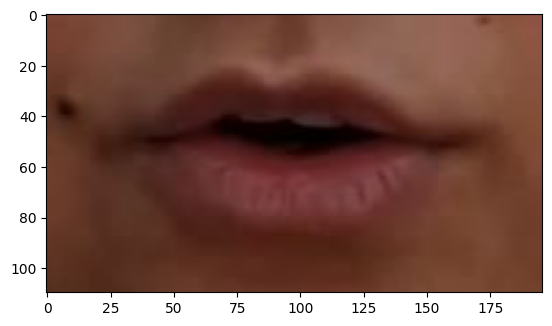

In [ ]:
plt.imshow(padded_x_train[0][2])


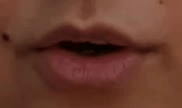
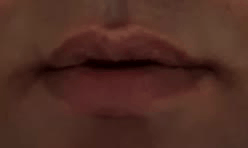
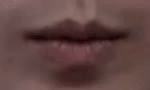
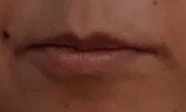
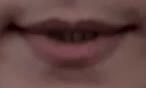
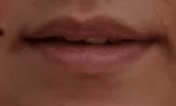
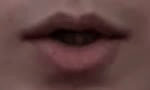
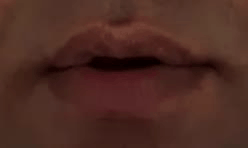
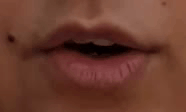
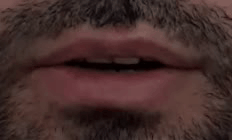

In [ ]:
# Showing 10 samples from train_MP4
utils.show_MP4(files = train_MP4 , labels = train_labels , num_to_class_dict = num_to_class_dict , number_of_samples = 10)